In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sketch

%load_ext autoreload
%autoreload 2



In [54]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')
data.head(2)
data['time'] = pd.to_datetime(data['time'])
data.set_index("time", inplace=True)

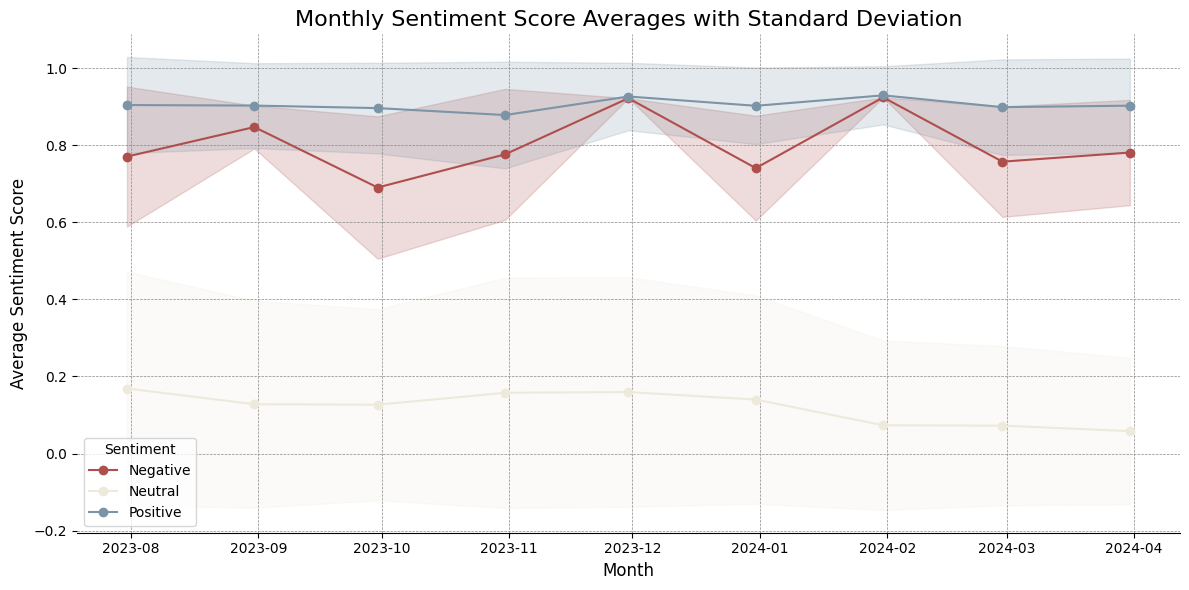

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming filtered_data is your DataFrame and 'sentiment_score' is the column with the scores
# Also assuming that 'time' column has been converted to datetime and set as the index

# Calculate the standard deviation for each month and sentiment
monthly_sentiment_std = (
    data.groupby("sentiment")
    .resample("M")["sentiment_score"]
    .std()
    .unstack(level=0)
)

# Fill NaN values
monthly_sentiment_std.fillna(0, inplace=True)

# Calculate the mean sentiment scores for each month and sentiment, if not already done
monthly_sentiment_means_adjusted = (
    data.groupby("sentiment")
    .resample("M")["sentiment_score"]
    .mean()
    .unstack(level=0)
)

# Fill NaN values for the means
monthly_sentiment_means_adjusted.fillna(0, inplace=True)

# Define colors for each sentiment
colors = {"negative": "#ae4f4d", "neutral": "#edeadc", "positive": "#7b94a6"}

# Creating the plot for monthly sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each sentiment mean with standard deviation as shaded area
for sentiment in monthly_sentiment_means_adjusted.columns:
    # Plot the mean sentiment scores
    ax.plot(monthly_sentiment_means_adjusted.index, monthly_sentiment_means_adjusted[sentiment],
            label=sentiment.capitalize(), marker='o', color=colors[sentiment])
    
    # Add the standard deviation with a shaded area
    ax.fill_between(monthly_sentiment_means_adjusted.index,
                    monthly_sentiment_means_adjusted[sentiment] - monthly_sentiment_std[sentiment],
                    monthly_sentiment_means_adjusted[sentiment] + monthly_sentiment_std[sentiment],
                    color=colors[sentiment], alpha=0.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
plt.title("Monthly Sentiment Score Averages with Standard Deviation", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sentiment Score", fontsize=12)
plt.legend(title="Sentiment")
plt.tight_layout()

# Show the plot (or use st.pyplot(plt) if you are using Streamlit)
st.pyplot(plt)

In [30]:
for text in data['free_text'][:550]:
    print(text)

Very friendly caring staff, treated me with respect and listened to my problem
so good so confidential
The doctor was very understanding and very knowledgeable.
Dr [PERSON] was extremely nice 
I was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone I wasn’t able to answer but I was called back twice to complete my assessment of my health worry. 
nan
Very professional and very kind. I feel comfortable when I attend my appointment there. 
Faster appointment & treatment ..
Love the practice
The nurse Miss [PERSON] was absolutely amazing, understanding, kind, fun, thorough, careful! She is the best!
I have been with surgery for considerable  years and was well looked after by Dr [PERSON] & hoping the work ethic continues, apart that good service, good location etc
Efficient, friendly  staff 
nan
Because the staff are very helpful 
Nurse [PERSON] is really helpful and look after us. 
Friendly,  professional and easil

In [35]:
import string
import pandas as pd
import numpy as np

def remove_special_characters(sentence):
    # Define the characters to remove
    special_chars = ['[', ']', '(', ')', '\n', '-']

    # Remove each special character
    for char in special_chars:
        sentence = sentence.replace(char, '')

    return sentence


data['free_text'] = data['free_text'].apply(lambda x: remove_special_characters(str(x)) if not pd.isna(x) else np.nan)
data['do_better'] = data['do_better'].apply(lambda x: remove_special_characters(str(x)) if not pd.isna(x) else np.nan)

In [41]:
data.to_csv('../friendsfamilytest/data/data22.csv', index=False)

In [40]:
%pwd

'/Users/janduplessis/code/janduplessis883/friends-and-family-test-analysis/notebooks'

In [ ]:
data.to_csv()

In [14]:
data['free_text'] = data['free_text'].str.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace('\n', '')

/var/folders/zk/h05bglw168z9vq1c9b862q480000gn/T/ipykernel_74486/1715307152.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['free_text'] = data['free_text'].str.replace('[', '').replace(']', '').replace('(', '').replace(')', '').replace('\n', '')


In [15]:
for text in data['free_text']:
    print(text)

Very friendly caring staff, treated me with respect and listened to my problem
so good so confidential
The doctor was very understanding and very knowledgeable.
Dr PERSON] was extremely nice 
I was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone I wasn’t able to answer but I was called back twice to complete my assessment of my health worry. 
nan
Very professional and very kind. I feel comfortable when I attend my appointment there. 
Faster appointment & treatment ..
Love the practice
The nurse Miss PERSON] was absolutely amazing, understanding, kind, fun, thorough, careful! She is the best!
I have been with surgery for considerable  years and was well looked after by Dr PERSON] & hoping the work ethic continues, apart that good service, good location etc
Efficient, friendly  staff 
nan
Because the staff are very helpful 
Nurse PERSON] is really helpful and look after us. 
Friendly,  professional and easily ac